In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv("titanic_train.csv")

In [5]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Cleaning the Train Data Set

In [6]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [7]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

In [8]:
train.drop('Cabin' , axis = 1, inplace = True)

In [9]:
train.dropna(inplace = True)

In [11]:
sex_train = pd.get_dummies(train['Sex'], drop_first = True)

In [12]:
embark_train = pd.get_dummies(train['Embarked'], drop_first = True)

In [13]:
train = pd.concat([train, sex_train, embark_train], axis = 1)

In [14]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1,0,1


In [15]:
train.drop(['PassengerId', 'Sex' , 'Embarked', 'Name' , 'Ticket'], axis = 1, inplace = True)

In [16]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Cleaning the Test Data Set

In [17]:
test = pd.read_csv("titanic_test.csv")

In [18]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

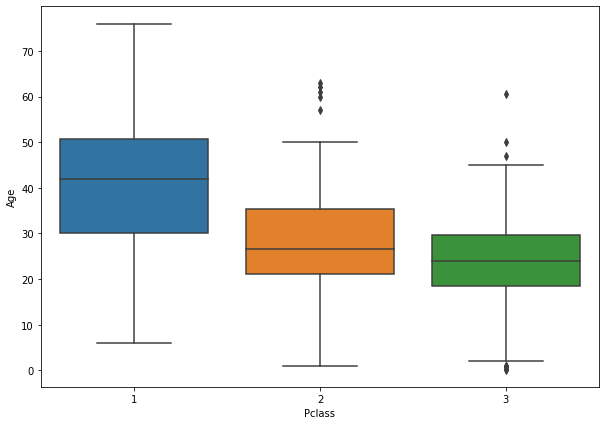

In [20]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data= test)

In [21]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 26
        else:
            return 24
    else:
        return Age

In [22]:
test['Age'] = test[['Age', 'Pclass']].apply(impute_age_test, axis = 1)

In [24]:
test.drop('Cabin' , axis = 1, inplace = True)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


In [29]:
test.dropna(inplace = True)

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [33]:
sex_test = pd.get_dummies(test['Sex'], drop_first = True)

In [35]:
embark_test = pd.get_dummies(test['Embarked'], drop_first = True)

In [37]:
test = pd.concat([test, sex_test, embark_test], axis = 1)

In [39]:
test.drop(['PassengerId', 'Sex' , 'Embarked', 'Name' , 'Ticket'], axis = 1, inplace = True)

In [40]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [41]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Machine Learning

In [43]:
X_train = train[['Pclass', 'Age', 'SibSp', 'Parch' , 'Fare', 'male', 'Q', 'S']]
y_train = train['Survived']
X_test = test[['Pclass', 'Age', 'SibSp', 'Parch' , 'Fare', 'male', 'Q', 'S']]

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression(max_iter=500)

In [46]:
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [63]:
train_predictions = logmodel.predict(X_train)

In [47]:
predictions = logmodel.predict(X_test)

In [50]:
logmodel.score(X_train, y_train)

0.8065241844769404

In [55]:
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(y_train, train_predictions))

[[477  72]
 [100 240]]


In [52]:
df = pd.DataFrame(predictions)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       417 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB
